#  *Land-Ocean Temperature Index, ERSSTv5, 1200km smoothing*  Dataset

This is the dataset that we'll be using for this project and the notebook.

# 1. Load in Data & create *ds* (our *xarray dataset*)
This project uses data from *CMIP6 NERC* and we are analyzing the *Land-Ocean Temperature Index, ERSSTv5, 1200km smoothing* data to look at surface air temperature anomaly data. This data is an estimate of global . (https://data.giss.nasa.gov/gistemp/) 
1. Download the data from: https://data.giss.nasa.gov/gistemp/
2. Import Python libraries:
- xarray
- pandas
- matplotlib
- cartopy
3. Create a *Dataset* from the netCDF file

     |████████████████████████████████| 12.1 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.3 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516275 sha256=8a592c202712cc60c613a993fb5a46154baa6f0039a70ff7061c66d79edad439
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as cfeature
import xarray as xr

ds = xr.open_dataset("/content/residualFrac_Lmon_GISS-E2-1-G_hist-1950HC_r1i1p3f1_gn_195001-200012.nc")

ds

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 90, lon: 144, time: 612)
Coordinates:
  * time          (time) object 1950-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat           (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon           (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    type          |S8 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) object ...
    lat_bnds      (lat, bnds) float64 ...
    lon_bnds      (lon, bnds) float64 ...
    residualFrac  (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            AerChemMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/ef4248ac-de4e-45e0-b8a8-7199802efd8f
    variable_id:            residualFrac
    variant_label:          r1i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

# 2. Create global temp anomaly panel
The following view provides the percentage of  where each picture is a **year** 
1. Use the previously created *xarray dataset*, **ds** to clean up the data. First resample the data so that we only grab the yearly frequency & so that we look at the average. Set this equal to *climate*
2. Grab the data variable that we need for the next series of visualizations. The data variable that we're interested is *'tempanomaly'* We want to grab the data variable from the cleaned up *dataset* that we created. Set that equal to **anomaly**
3. Take a look at anomaly and confirm that we've got the data variable that we want & that we are just bringing in data on a yearly basis.
4. Use *matplotlib* to select every year in our dataset, from 1880 to 2021, plot it on a map, and set is so that there are twelve years set per each row in the figure

In [ ]:
climate = ds.resample(time='Y').mean()
anomaly = climate['residualFrac']
time = anomaly.indexes['time'].to_datetimeindex()
anomaly['time'] = time
anomaly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.DataArray 'residualFrac' (time: 51, lat: 90, lon: 144)>
array([[[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
...
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        [100., 100., 100., ..., 100., 100., 100.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2000-12-31
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
    type     |S8 b'residual'

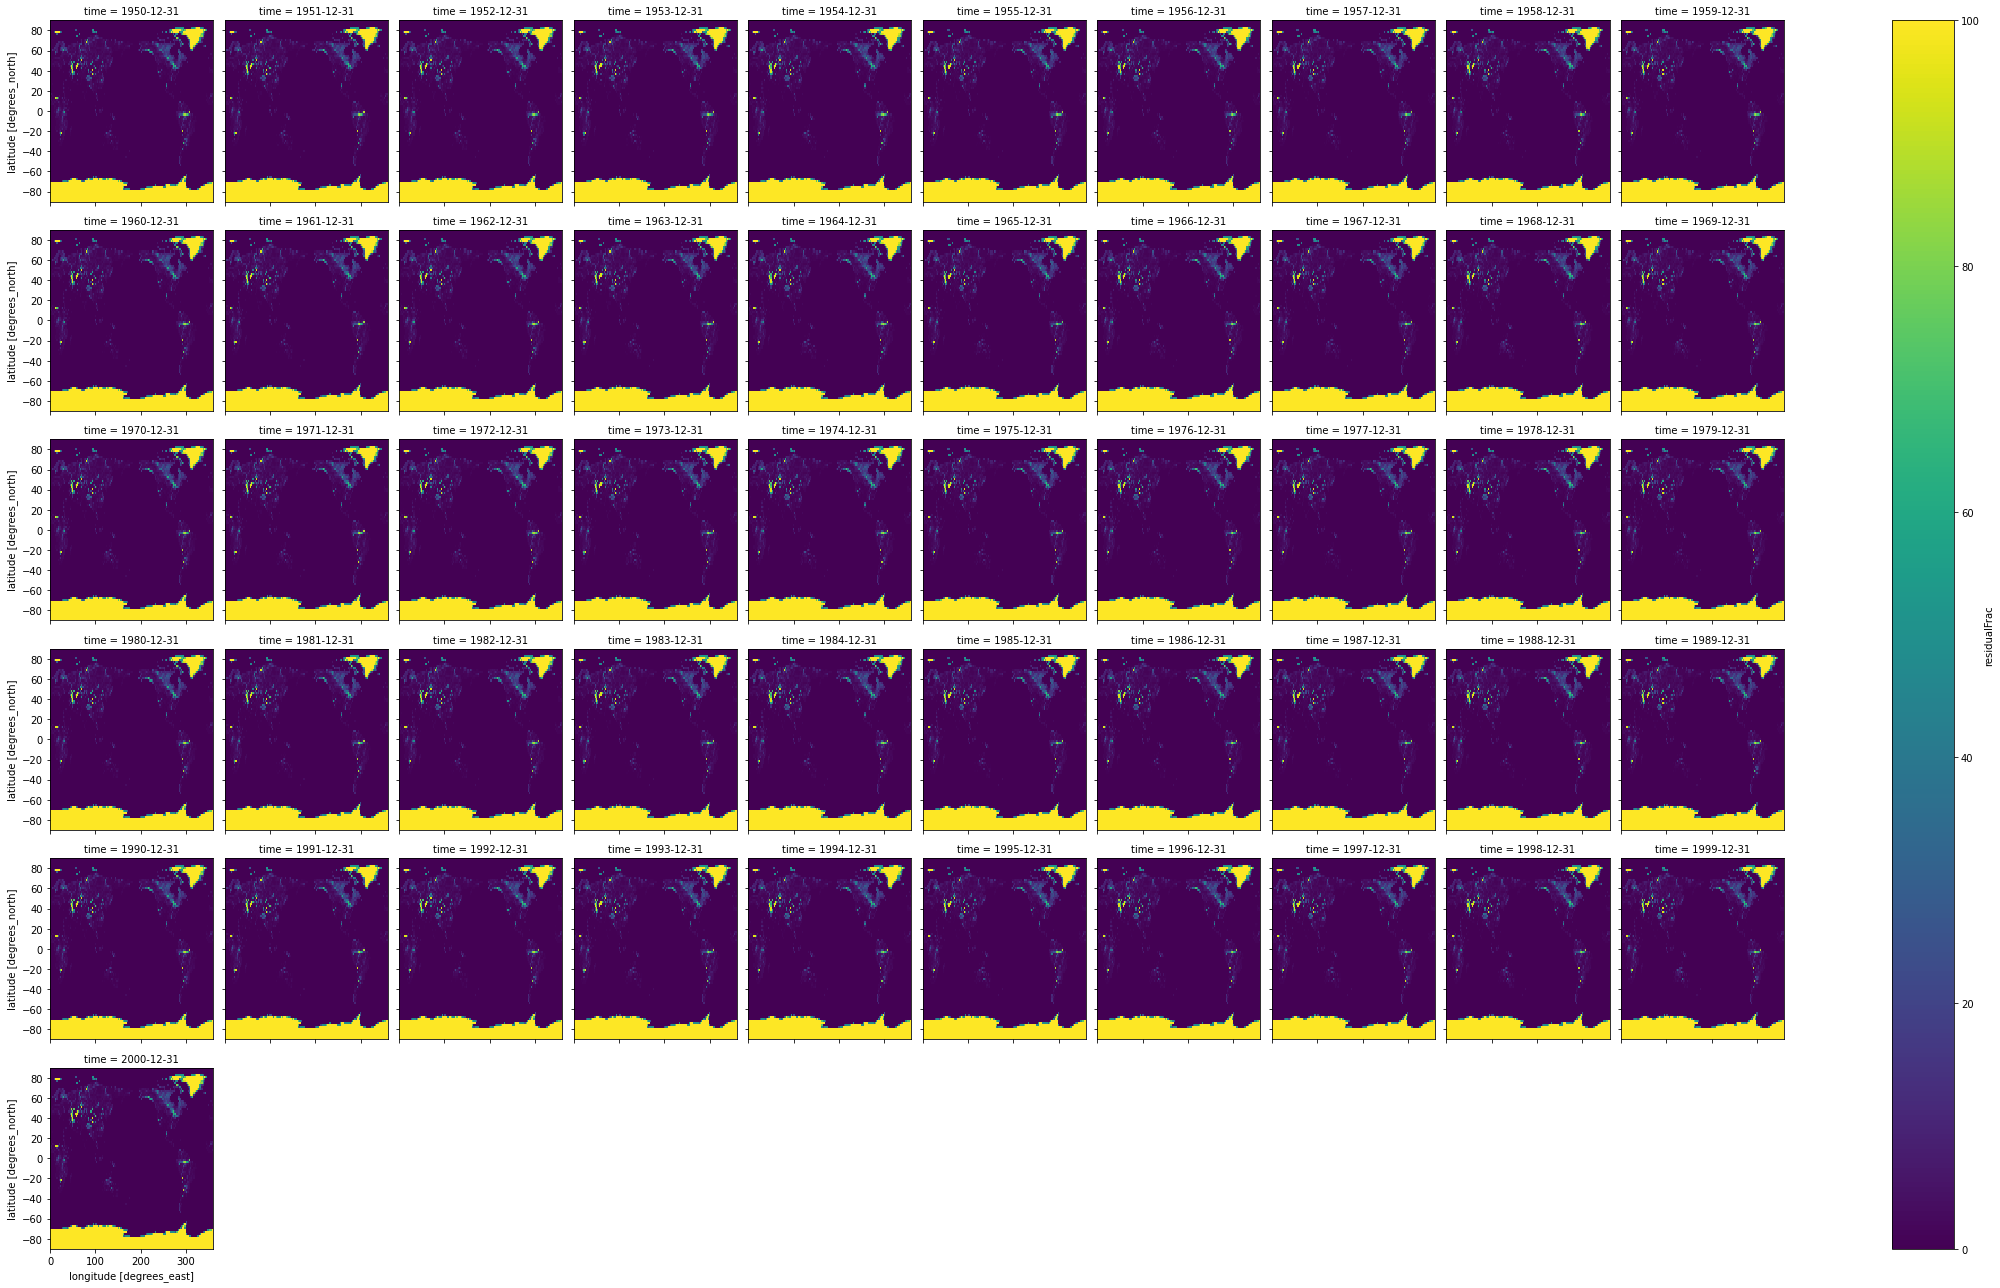

In [ ]:
world_figure = anomaly.sel(time=slice("1950", "2000")).plot(col="time", col_wrap=10, robust=True);

In [ ]:
import numpy as np
dfland = pd.DataFrame({'year':[],'land':[]})
for i in range(len(anomaly.time)):
  lnd = np.matrix(anomaly[i]).sum()/(90*144)
  yr = np.datetime_as_string(anomaly[i].time)
  dfland.loc[len(dfland.index)] = [yr,lnd]

In [ ]:
dfland.head()

,year,land
0,1950-12-31T00:00:00.000000000,12.742523
1,1951-12-31T00:00:00.000000000,12.730953
2,1952-12-31T00:00:00.000000000,12.737588
3,1953-12-31T00:00:00.000000000,12.733042
4,1954-12-31T00:00:00.000000000,12.740595


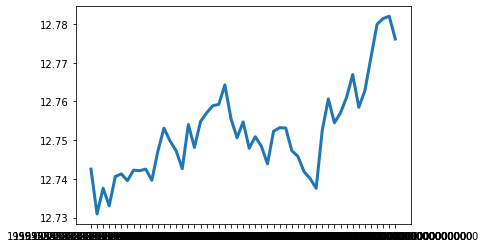

In [ ]:
plt.plot(dfland.year, dfland.land, linewidth=3)

The above shows the global average of land percentage not being used for the long_name: Fraction of Grid Cell that is Land but Neither Vegetation-Covered nor Bare Soil
comment: Percentage of entire grid cell  that is land and is covered by  neither vegetation nor bare-soil (e.g., urban, ice, lakes, etc.)
units: %

# Step 3. Animate Global Temp Anomaly

1. We can use *matplotlib (pyplot as plt)* to create a map for the surface temp anomalies of the globe
2. We can use *ffmpeg* to create an animation out of all the pictures from step 1
3. *"...mp4"* is saved in the repo, which can be used for the presentation

Additional Resources
- [Instructions for installing ffmpeg](https://www.youtube.com/watch?v=r1AtmY-RMyQ&ab_channel=TroubleChute)
- [Source to download here](https://www.gyan.dev/ffmpeg/builds/)
- [Found a Medium article that breaks down what we need](https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


IndexError: ignored

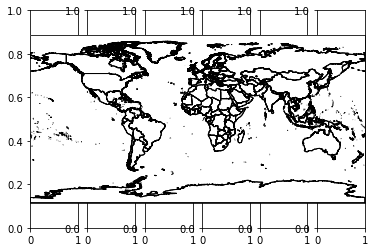

In [ ]:
#Downsample the time series to yearly frequency.

climate = ds.resample(time='Y').mean()
cover = climate['residualFrac']

#Creating an animation for 1950-2000 and saving it as an MP4 video.
#Setting the location for the world map
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}
fig, ax = plt.subplots(1, 6)

ax[0] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[0].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax[1] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[1].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax[2] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[2].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax[3] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[3].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax[4] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[4].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
ax[5] = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax[5].add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
              facecolor='none', edgecolor='black')
  
ax[0].cover.isel(time=0).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[0].set_title("Percentage cover of land that is neither vegetation nor bare-soil 1950 [%]")

ax[1].cover.isel(time=10).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[1].set_title("Percentage cover of land that is neither vegetation nor bare-soil 1960 [%]")

ax[2].cover.isel(time=20).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[2].set_title("Percentage cover of land that is neither vegetation nor bare-soil 1970 [%]")

ax[0, 3].cover.isel(time=30).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[0, 3].set_title("Percentage cover of land that is neither vegetation nor bare-soil 1980 [%]")

ax[0, 4].cover.isel(time=40).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[0, 4].set_title("Percentage cover of land that is neither vegetation nor bare-soil 1990 [%]")

ax[0, 5].cover.isel(time=50).plot.imshow(ax=ax, add_labels=False,
                      vmin=0, vmax=100, cmap='viridis', animated=True,
                      cbar_kwargs=cbar_kwargs, interpolation='bicubic')
ax[0, 5].set_title("Percentage cover of land that is neither vegetation nor bare-soil 2000 [%]")

# image1 = anomaly.isel(time=50).plot.imshow(ax=ax, add_labels=False,
#                        vmin=0, vmax=100, cmap='viridis', animated=True,
#                        cbar_kwargs=cbar_kwargs, interpolation='bicubic')

# def animate(t):
#     date =  pd.to_datetime(anomaly.sel(time=t)['time'].values)
#     ax.set_title("Temperature Anomaly in " + str(date.time) + " [°C]")
#     ax.title.set_fontsize(30)
#     image.set_array(anomaly.sel(time=t))
#     return image

# ani = FuncAnimation(fig, animate, frames=anomaly['time'].values[-141:], blit=False)
# ani.save("world_temp_all_years.mp4", fps=2, extra_args=['-vcodec','libx264', '-crf','15', '-preset','veryslow'])


In [ ]:
range(5)

range(0, 5)

# Step 4: Select the U.S. Region & Output As NetCDF
We can use `sel()` or `isel()` to grab the region
We can use `where()` to select all values within the bounds of interest

1. Create an *xarray dataset* that limits the location to the U.S. with the *slice* & then **resample** that dataset so that the time is set to be per *year* (the original is a monthly timestep) 
2. First plot the selected region to make sure that we're grabbing the right place
3. Save the U.S. dataset as a *netcdf file* to load into Paraview

Additional Resources
- `ax.set_extent` gets modified to select specific regions
- [This gist shows what the various min/max lat/long are for the various countires that may need to be analyzed](https://gist.github.com/graydon/11198540)

In [ ]:
anomaly_temp_USA = ds.sel(lat=slice(25, 50), lon=slice(-125, -67))

anomaly_temp_USA = anomaly_temp_USA.resample(time="Y").mean()

anomaly_temp_USA

NameError: ignored

C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\iarreola\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


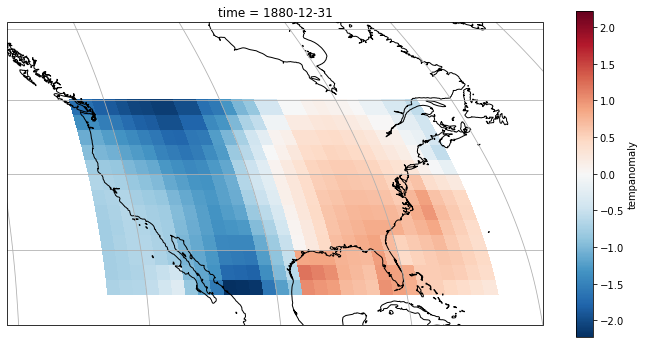

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.coastlines()
ax.gridlines()
anomaly_temp_USA.tempanomaly.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})
ax.set_extent([-135, -60, 20, 55])     

In [ ]:
#output the dataset to a netcdf file so that we can load into Paraview

anomaly_temp_USA.to_netcdf("usa_data_year_resample.nc")